In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 14,
    'style'  : 'normal'}
matplotlib.rc('font', **font)

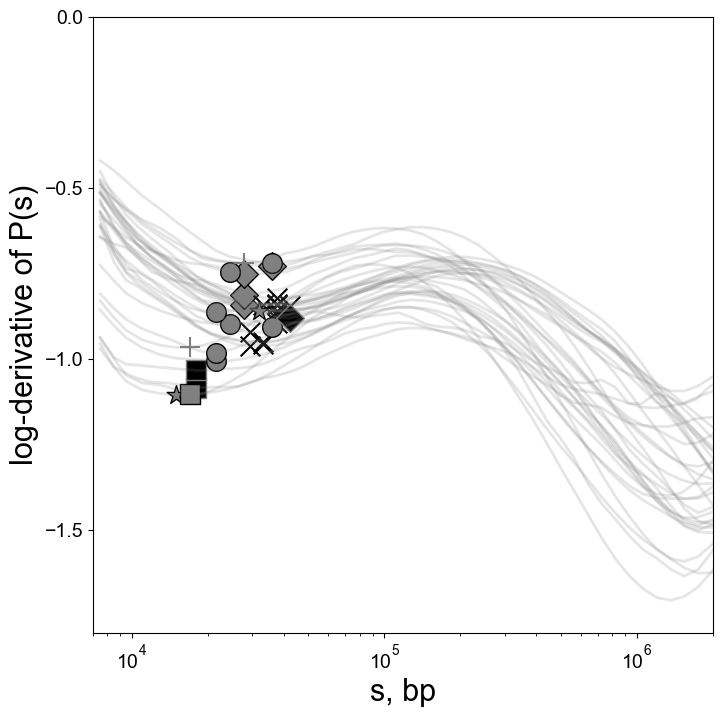

In [17]:
# Fig. 2A: collection of Hi-C curves from data/

#data_dir = "logders_fig2_33data"
data_dir = "../data"

sg = 1

states_zhang = ["mid_G1", "late_G1"]
states_abramo = ["4h", "5h", "6h", "7h"]
states_bonev = ["HiC_CN_1.mm10.mapq_30.1000.mcool", "HiC_CN_2.mm10.mapq_30.1000.mcool", "HiC_CN_3.mm10.mapq_30.1000.mcool",\
               "HiC_CN_4.mm10.mapq_30.1000.mcool", "HiC_CN_5.mm10.mapq_30.1000.mcool", "HiC_CN_6.mm10.mapq_30.1000.mcool",\
               "HiC_ES_1.mm10.mapq_30.1000.mcool", "HiC_ES_2.mm10.mapq_30.1000.mcool", "HiC_ES_3.mm10.mapq_30.1000.mcool",\
               "HiC_ES_4.mm10.mapq_30.1000.mcool", "HiC_ncx_CN_1.mm10.mapq_30.1000.mcool", "HiC_ncx_CN_2.mm10.mapq_30.1000.mcool",\
               "HiC_ncx_CN_3.mm10.mapq_30.1000.mcool", "HiC_ncx_CN_4.mm10.mapq_30.1000.mcool"]

states_rao = ["GM12878_inSitu_DpnII.hg38.mapq_30.1000.mcool", "HMEC_inSitu_MboI.hg38.mapq_30.1000.mcool", \
             "HUVEC_inSitu_MboI.hg38.mapq_30.1000.mcool", "IMR90_inSitu_MboI.hg38.mapq_30.1000.mcool", \
             "K562_inSitu_MboI.hg38.mapq_30.1000.mcool", "KBM7_inSitu_MboI.hg38.mapq_30.1000.mcool", \
             "NHEK_inSitu_MboI.hg38.mapq_30.1000.mcool"]

states_hff = ["U54-HFFc6-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool", "hg38_deep"]
states_esc = ["U54-ESC4DN-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool", "U54-ESC4DN-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool"]

states_wutz = ["control.hg38.mapq_30.1000.mcool"]
states_schwarzer = ["TAM.mm10.mapq_30.1000.mcool"]

fig = plt.figure(figsize=(8, 8)) 


xs_abramo=[]
ys_abramo=[]
for state in states_abramo:
    
    slope = pickle.load(open(f'{data_dir}/full_logder_y_abramo_{state}.pickle', 'rb'))
    mids = pickle.load(open(f'{data_dir}/full_logder_x_abramo_{state}.pickle', 'rb'))

    y=np.min(slope[0:20])
    x=mids[1+np.argmin(slope[0:20])]*1000
    
    xs_abramo.append(x)
    ys_abramo.append(y)

    plt.scatter([x], [y], color='gray', s=200, marker='D', edgecolors='k')

    plt.plot(mids[1:]*1000, slope, color='gray', linewidth=2, alpha=0.2)
    

xs_abramo=np.array(xs_abramo)
ys_abramo=np.array(ys_abramo)


xs_zhang=[]
ys_zhang=[]
for state in states_zhang:
    
    slope = pickle.load(open(f'{data_dir}/full_logder_y_zhang_{state}.pickle', 'rb'))
    mids = pickle.load(open(f'{data_dir}/full_logder_x_zhang_{state}.pickle', 'rb'))

    y=np.min(slope[0:20])
    x=mids[1+np.argmin(slope[0:20])]*1000
    
    xs_zhang.append(x)
    ys_zhang.append(y)

    plt.scatter([x], [y], color='k', s=200, marker='s', edgecolors='gray')

    plt.plot(mids[1:]*1000, slope, color='gray', linewidth=2, alpha=0.2)
    
xs_zhang=np.array(xs_zhang)
ys_zhang=np.array(ys_zhang)


xs_bonev=[]
ys_bonev=[]
for state in states_bonev:
    
    slope = pickle.load(open(f'{data_dir}/full_logder_y_bonev_{state}.pickle', 'rb'))
    mids = pickle.load(open(f'{data_dir}/full_logder_x_bonev_{state}.pickle', 'rb'))

    y=np.min(slope[0:20])
    x=mids[1+np.argmin(slope[0:20])]*1000
    
    xs_bonev.append(x)
    ys_bonev.append(y)

    plt.scatter([x], [y], color='k', s=200, marker='x')

    plt.plot(mids[1:]*1000, slope, color='gray', linewidth=2, alpha=0.2)

xs_bonev=np.array(xs_bonev)
ys_bonev=np.array(ys_bonev)


xs_rao=[]
ys_rao=[]
for state in states_rao:
    
    slope = pickle.load(open(f'{data_dir}/full_logder_y_rao_{state}.pickle', 'rb'))
    mids = pickle.load(open(f'{data_dir}/full_logder_x_rao_{state}.pickle', 'rb'))

    y=np.min(slope[0:20])
    x=mids[1+np.argmin(slope[0:20])]*1000
    
    xs_rao.append(x)
    ys_rao.append(y)

    plt.scatter([x], [y], color='gray', s=200, marker='o', edgecolors='k')

    plt.plot(mids[1:]*1000, slope, color='gray', linewidth=2, alpha=0.2)

xs_rao=np.array(xs_rao)
ys_rao=np.array(ys_rao)


xs_hff=[]
ys_hff=[]
for state in states_hff:
    
    slope = pickle.load(open(f'{data_dir}/full_logder_y_oksuz_hff_{state}.pickle', 'rb'))
    mids = pickle.load(open(f'{data_dir}/full_logder_x_oksuz_hff_{state}.pickle', 'rb'))

    y=np.min(slope[0:20])
    x=mids[1+np.argmin(slope[0:20])]*1000
    
    xs_hff.append(x)
    ys_hff.append(y)

    plt.scatter([x], [y], color='gray', s=200, marker='*', edgecolors='k')

    plt.plot(mids[1:]*1000, slope, color='gray', linewidth=2, alpha=0.2)
    
xs_hff=np.array(xs_hff)
ys_hff=np.array(ys_hff)


xs_esc=[]
ys_esc=[]
for state in states_esc:
    
    slope = pickle.load(open(f'{data_dir}/full_logder_y_oksuz_esc_{state}.pickle', 'rb'))
    mids = pickle.load(open(f'{data_dir}/full_logder_x_oksuz_esc_{state}.pickle', 'rb'))

    y=np.min(slope[0:20])
    x=mids[1+np.argmin(slope[0:20])]*1000
    
    xs_esc.append(x)
    ys_esc.append(y)

    plt.scatter([x], [y], color='gray', s=200, marker='+')

    plt.plot(mids[1:]*1000, slope, color='gray', linewidth=2, alpha=0.2)
    
xs_esc=np.array(xs_esc)
ys_esc=np.array(ys_esc)


xs_wutz=[]
ys_wutz=[]
for state in states_wutz:
    
    slope = pickle.load(open(f'{data_dir}/full_logder_y_wutz_{state}.pickle', 'rb'))
    mids = pickle.load(open(f'{data_dir}/full_logder_x_wutz_{state}.pickle', 'rb'))

    y=np.min(slope[0:20])
    x=mids[1+np.argmin(slope[0:20])]*1000
    
    xs_wutz.append(x)
    ys_wutz.append(y)

    plt.scatter([x], [y], color='gray', s=200, marker='s', edgecolors='k')

    plt.plot(mids[1:]*1000, slope, color='gray', linewidth=2, alpha=0.2)

xs_wutz=np.array(xs_wutz)
ys_wutz=np.array(ys_wutz)


xs_sch=[]
ys_sch=[]
for state in states_schwarzer:
    
    slope = pickle.load(open(f'{data_dir}/full_logder_y_schwarzer_{state}.pickle', 'rb'))
    mids = pickle.load(open(f'{data_dir}/full_logder_x_schwarzer_{state}.pickle', 'rb'))

    y=np.min(slope[0:20])
    x=mids[1+np.argmin(slope[0:20])]*1000
    
    xs_sch.append(x)
    ys_sch.append(y)

    plt.scatter([x], [y], color='k', s=200, marker='D', edgecolors='gray')

    plt.plot(mids[1:]*1000, slope, color='gray', linewidth=2, alpha=0.2)
    
xs_sch=np.array(xs_sch)
ys_sch=np.array(ys_sch)


plt.ylim([-1.8, 0])
plt.xlim([0.7*10**4, 2*10**6])
plt.yticks([-1.5, -1.0, -0.5, 0.0])

plt.xlabel('s, bp', fontsize=22)
plt.ylabel('log-derivative of P(s)', fontsize=22)
plt.xscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.show()
